In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import calendar

In [2]:
df=pd.read_excel('Online Retail.xlsx')

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

# Questions of interest to the CEO

### Which region is generating the highest revenue, and which region is generating the lowest?

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df['Amount']=df['Quantity']*df['UnitPrice']

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
region_revenue=df.groupby('Country').sum()['Amount'].reset_index()

In [14]:
region_revenue.head()

,Country,Amount
0,Australia,137077.27
1,Austria,10154.32
2,Bahrain,548.40
3,Belgium,40910.96
4,Brazil,1143.60


In [15]:
region_revenue[region_revenue['Amount']==region_revenue['Amount'].max()]

,Country,Amount
35,United Kingdom,6767873.394


In [16]:
region_revenue[region_revenue['Amount']==region_revenue['Amount'].min()]

,Country,Amount
28,Saudi Arabia,131.17


Let's Visualize our observation

In [17]:
countries=[]
for i in region_revenue['Country']:
    countries.append(i)

In [18]:
revenue=[]
for i in region_revenue['Amount']:
    revenue.append(i)

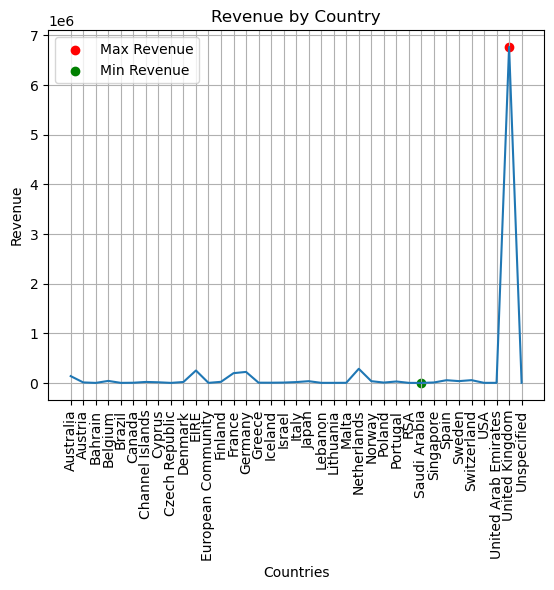

In [19]:
plt.plot(countries, revenue)

# Find the indices of maximum and minimum revenue values
max_index = revenue.index(max(revenue))
min_index = revenue.index(min(revenue))

# Add markers to highlight the maximum and minimum revenue points
plt.scatter(countries[max_index], revenue[max_index], color='r', label='Max Revenue')
plt.scatter(countries[min_index], revenue[min_index], color='g', label='Min Revenue')

plt.xlabel('Countries')
plt.ylabel('Revenue')
plt.title('Revenue by Country')
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

### What is the monthly trend of revenue, which months have faced the biggest increase/decrease?

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [21]:
monthly_revenue=df.groupby(df.InvoiceDate.dt.month)['Amount'].sum().reset_index()

In [22]:
monthly_revenue

,InvoiceDate,Amount
0,1,475074.380
1,2,436546.150
2,3,579964.610
3,4,426047.851
4,5,648251.080
5,6,608013.160
6,7,574238.481
7,8,616368.000
8,9,931440.372
9,10,974603.590


In [23]:
monthly_revenue['InvoiceDate'] = monthly_revenue['InvoiceDate'].apply(lambda x: calendar.month_name[x])

In [24]:
monthly_revenue=monthly_revenue.rename(columns={'InvoiceDate':'Month'})

In [25]:
monthly_revenue

,Month,Amount
0,January,475074.380
1,February,436546.150
2,March,579964.610
3,April,426047.851
4,May,648251.080
5,June,608013.160
6,July,574238.481
7,August,616368.000
8,September,931440.372
9,October,974603.590


In [26]:
months=[]
amounts=[]
for i in monthly_revenue['Month']:
    months.append(i)
    
for j in monthly_revenue['Amount']:
    amounts.append(j)
    

In [27]:
amounts

[475074.38,
 436546.15,
 579964.61,
 426047.851,
 648251.08,
 608013.16,
 574238.481,
 616368.0,
 931440.372,
 974603.59,
 1132407.74,
 897110.4]

In [28]:
diff=[]
for i in range(len(amounts)-1):
    diff.append(amounts[i+1] - amounts[i])

In [29]:
diff

[-38528.22999999998,
 143418.45999999996,
 -153916.75899999996,
 222203.22899999993,
 -40237.919999999925,
 -33774.679000000004,
 42129.51899999997,
 315072.372,
 43163.21799999999,
 157804.15000000002,
 -235297.33999999997]

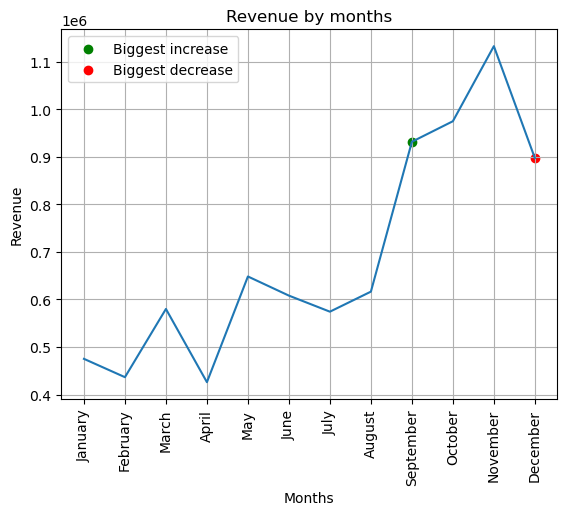

In [30]:
plt.plot(months, amounts)

# Find the indices of biggest increase/decrease revenue values
max_diff_index = diff.index(max(diff))+1
min_diff_index = diff.index(min(diff))+1

# Add markers to highlight the biggest increase/decrease
plt.scatter(months[max_diff_index], amounts[max_diff_index], color='g', label='Biggest increase')
plt.scatter(months[min_diff_index], amounts[min_diff_index], color='r', label='Biggest decrease')

plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Revenue by months')
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

### Which months generated the most revenue? Is there a seasonality in sales?

In [31]:
most_revenue=monthly_revenue.sort_values('Amount', ascending=False).head(4)

In [32]:
most_revenue

,Month,Amount
10,November,1132407.740
9,October,974603.590
8,September,931440.372
11,December,897110.400


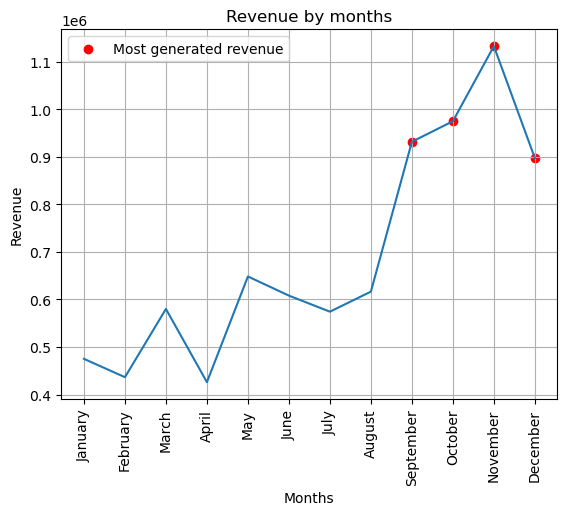

In [33]:
plt.plot(monthly_revenue['Month'],monthly_revenue['Amount'])
plt.scatter(most_revenue['Month'],most_revenue['Amount'],color='r',label='Most generated revenue')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Revenue by months')
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

### Who are the top customers and how much do they contribute to the total revenue? Is the business dependent on these customers or is the customer base diversified?

In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [35]:
customerly_revenue=df.groupby('CustomerID').sum()['Amount'].reset_index()

In [36]:
customerly_revenue

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


**Method - 1**

In [37]:
top_customers=customerly_revenue.sort_values('Amount',ascending=False).head(5)

In [38]:
top_customers

,CustomerID,Amount
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45


In [39]:
total_topCustomer_revenue=top_customers['Amount'].sum()

In [40]:
total_topCustomer_revenue

979707.75

In [41]:
total_revenue=df['Amount'].sum()

In [42]:
total_revenue

8300065.814000001

In [43]:
print((total_topCustomer_revenue/total_revenue)*100,'%')

11.803614235775022 %


**Method - 2**

In [44]:
customerly_revenue['% from total revenue']=customerly_revenue['Amount']/total_revenue*100

In [45]:
customerly_revenue.head()

,CustomerID,Amount,% from total revenue
0,12346.0,0.00,0.000000
1,12347.0,4310.00,0.051927
2,12348.0,1797.24,0.021653
3,12349.0,1757.55,0.021175
4,12350.0,334.40,0.004029


In [46]:
top_customers2=customerly_revenue.sort_values('% from total revenue',ascending=False).head(5)

In [47]:
top_customers2

,CustomerID,Amount,% from total revenue
1703,14646.0,279489.02,3.367311
4233,18102.0,256438.49,3.089596
3758,17450.0,187482.17,2.258803
1895,14911.0,132572.62,1.597248
55,12415.0,123725.45,1.490656


In [48]:
print(top_customers2['% from total revenue'].sum(),'%')

11.803614235775022 %
